### Dataset

In [39]:
import warnings
warnings.filterwarnings("ignore")

In [40]:
import pandas as pd

#Load the dataset
df = pd.read_csv("RoadAccident.csv")

###  Exploratory data analysis of the dataset

In [41]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [42]:
df.shape

(12316, 32)

In [43]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64


<Axes: >

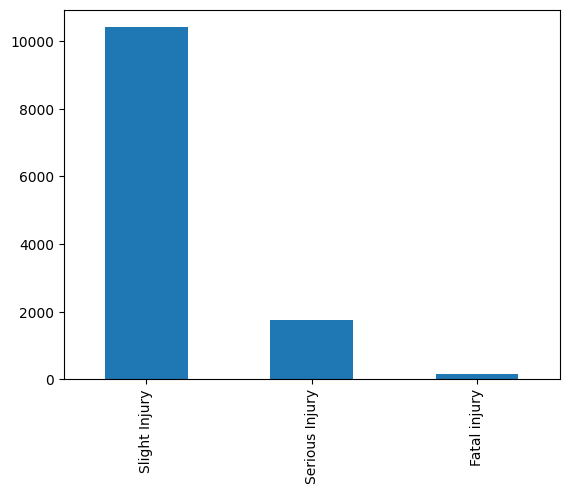

In [44]:
# target variable
print('Accident_severity')
print(df['Accident_severity'].value_counts())
df['Accident_severity'].value_counts().plot(kind='bar')

<Axes: >

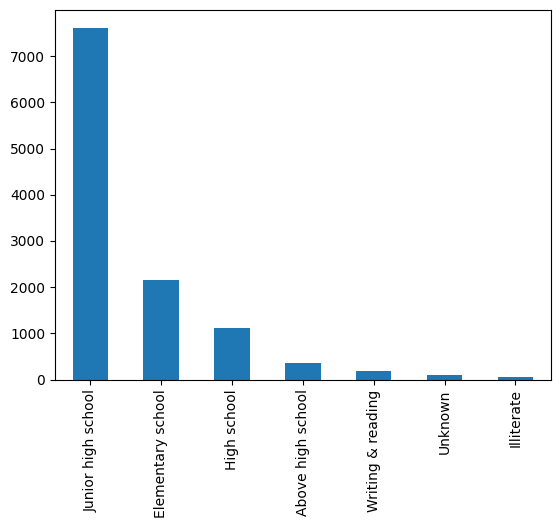

In [45]:
# Education level of the car drivers
df['Educational_level'].value_counts().plot(kind='bar')

In [46]:
pip install --upgrade seaborn


Note: you may need to restart the kernel to use updated packages.


<Figure size 800x600 with 0 Axes>

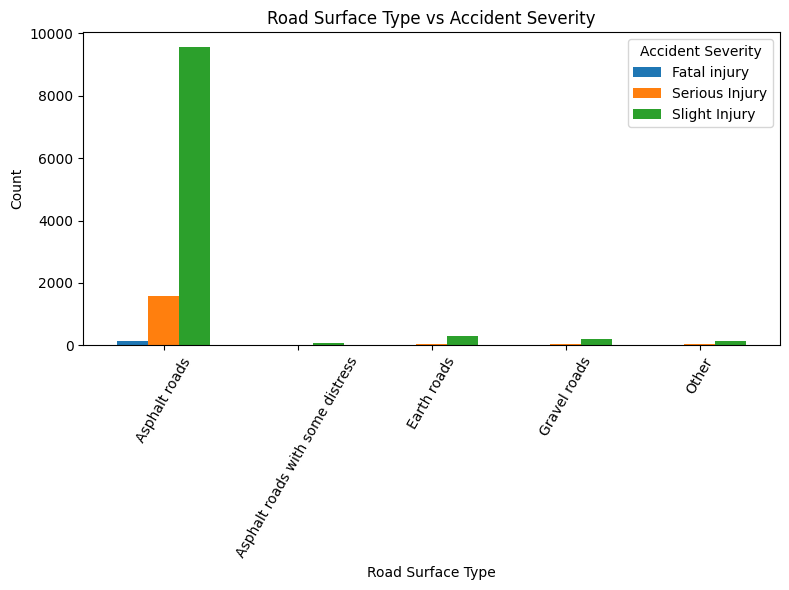

In [47]:
import matplotlib.pyplot as plt

# Group the data to count occurrences for each combination of 'Road_surface_type' and 'Accident_severity'
grouped_data = df.groupby(['Road_surface_type', 'Accident_severity']).size().unstack()

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot each category of 'Accident_severity' as bars
grouped_data.plot(kind='bar', stacked=False, figsize=(8, 6), width=0.7)

plt.xlabel('Road Surface Type')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.title('Road Surface Type vs Accident Severity')

# Display the plot
plt.legend(title='Accident Severity')
plt.tight_layout()
plt.show()

### Data Processing

In [48]:
#convert object type column into datetime datatype column
df['Time'] = pd.to_datetime(df['Time'])

In [49]:
data = df.copy()

In [50]:
# Extrating 'Hour_of_Day' feature from the Time column
df['Hour_of_Day'] = df['Time'].dt.hour

### Encode the Target

In [51]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
data['Accident_severity'] = lb.fit_transform(data['Accident_severity'])

In [52]:
data['Accident_severity'].value_counts()

2    10415
1     1743
0      158
Name: Accident_severity, dtype: int64

- As the Target Class ih highly imbalanced. So, we need to balance it.

### Balance Dataset

In [53]:
from imblearn.over_sampling import RandomOverSampler

X = data.drop(columns=["Accident_severity"])
y = data['Accident_severity']

In [54]:
oversampler = RandomOverSampler(random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X,y)

In [55]:
print('y :')
print(y.value_counts())
print('y_reaampled :')
print(y_resampled.value_counts())

y :
2    10415
1     1743
0      158
Name: Accident_severity, dtype: int64
y_reaampled :
2    10415
1    10415
0    10415
Name: Accident_severity, dtype: int64


- Split the data 

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, 
                                                    y_resampled, 
                                                    test_size=0.2, 
                                                    random_state=42)

### Fill the Missing values

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Define the strategies for each column
strategies = {
    3: 'most_frequent',   # Educational_level
    4: 'most_frequent',   # Vehicle_driver_relation
    5: 'most_frequent',   # Driving_experience
    6: 'most_frequent',   # Type_of_vehicle
    8: 'constant',        # Service_year_of_vehicle
    9: 'constant',        # Defect_of_vehicle
    10: 'most_frequent',  # Area_accident_occured
    11: 'most_frequent',  # Lanes_or_Medians
    12: 'most_frequent',  # Road_allignment
    13: 'most_frequent',  # Types_of_Junction
    14: 'most_frequent',  # Road_surface_type
    18: 'most_frequent',  # Type_of_collision
    21: 'most_frequent',  # Vehicle_movement
    26: 'most_frequent',  # Work_of_casuality
    27: 'most_frequent'   # Fitness_of_casuality
}

# Create a ColumnTransformer for data preprocessing
tf1 = ColumnTransformer([
    ('impute_educational_level', SimpleImputer(strategy=strategies[3]), [3]),
    ('impute_Vehicle_driver_relation', SimpleImputer(strategy=strategies[4]), [4]),
    ('impute_Driving_experience', SimpleImputer(strategy=strategies[5]), [5]),
    ('impute_Type_of_vehicle', SimpleImputer(strategy=strategies[6]), [6]),
    ('impute_Service_year_of_vehicle', SimpleImputer(strategy=strategies[8], fill_value='Unknown'), [8]),
    ('impute_Defect_of_vehicle', SimpleImputer(strategy=strategies[9], fill_value='Unknown'), [9]),
    ('impute_Area_accident_occured', SimpleImputer(strategy=strategies[10]), [10]),
    ('impute_Lanes_or_Medians', SimpleImputer(strategy=strategies[11]), [11]),
    ('impute_Road_allignment', SimpleImputer(strategy=strategies[12]), [12]),
    ('impute_Types_of_Junction', SimpleImputer(strategy=strategies[13]), [13]),
    ('impute_Road_surface_type', SimpleImputer(strategy=strategies[14]), [14]),
    ('impute_Type_of_collision', SimpleImputer(strategy=strategies[18]), [18]),
    ('impute_Vehicle_movement', SimpleImputer(strategy=strategies[21]), [21]),
    ('impute_Work_of_casuality', SimpleImputer(strategy=strategies[26]), [26]),
    ('impute_Fitness_of_casuality', SimpleImputer(strategy=strategies[27]), [27])
], remainder='passthrough')


### Encode Categorical Columns

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define the object columns indices
object_columns_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,19,20,21,22,23,24,25,26,27,28,29,30]

# Create a ColumnTransformer for one-hot encoding only object columns
tf2 = ColumnTransformer([
    (f'ohe_{col}', OneHotEncoder(sparse=False, handle_unknown='ignore'), [col])
    for col in object_columns_indices
], remainder='passthrough')

# Apply the transformation
X_train_encoded = tf2.fit_transform(X_train)
X_train_encoded.shape

(24996, 1296)

### Feature selection using the ‘Chi2’ Statistic

Chi-squared (chi2) is a scoring function used in scikit-learn for feature selection. It computes the chi-squared statistic to evaluate the dependency between each feature and the target variable (e.g., accident severity). This method helps identify the relevance of features by measuring their statistical relationship with the target. Chi-squared is particularly effective for feature selection when working with categorical target variables.

In [59]:
# feature seleciton method using chi2 for categorical output, categorical input
from sklearn.feature_selection import SelectKBest, chi2

tf4 = SelectKBest(chi2, k=50)

### Import Random forest Classifier

In [60]:
# import the necessary liabrary
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score


tf5 = RandomForestClassifier()

### Create a Pipeline

In [61]:
# Construct the pipeline
from sklearn.pipeline import Pipeline
 
pipe = Pipeline([
    ('trf1', tf1),
    ('trf2', tf2),
    ('trf4', tf4),
    ('trf5', tf5)
])

# Train the pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_educational_level',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [3]),
                                                 ('impute_Vehicle_driver_relation',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [4]),
                                                 ('impute_Driving_experience',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [5]),
                                                 ('impute_Type_of_vehicle',
                                                  SimpleImputer(stra...
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [26]),
                                                 ('ohe_27',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [27]),
                                                 ('ohe_28',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [28]),
                                                 ('ohe_29',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [29]), ...])),
                ('trf4',
                 SelectKBest(k=50,
                             score_func=<function chi2 at 0x7fe8c11f1160>)),
                ('trf5', RandomForestClassifier())])

In [62]:
# Predict
y_pred = pipe.predict(X_test)
y_pred

array([1, 1, 2, ..., 0, 1, 1])

### Pipeline

In [63]:
# Pipe line names
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_educational_level',
                                  SimpleImputer(strategy='most_frequent'), [3]),
                                 ('impute_Vehicle_driver_relation',
                                  SimpleImputer(strategy='most_frequent'), [4]),
                                 ('impute_Driving_experience',
                                  SimpleImputer(strategy='most_frequent'), [5]),
                                 ('impute_Type_of_vehicle',
                                  SimpleImputer(strategy='most_frequent'), [6...
                                 ('impute_Road_surface_type',
                                  SimpleImputer(strategy='most_frequent'),
                                  [14]),
                                 ('impute_Type_of_collision',
                                  SimpleImputer(strategy='most_frequent'),
                                  [18]),
               

### Accuracy Score

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7884461513842215

### Classification Report

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2085
           1       0.69      0.75      0.72      2100
           2       0.75      0.65      0.70      2064

    accuracy                           0.79      6249
   macro avg       0.79      0.79      0.79      6249
weighted avg       0.79      0.79      0.79      6249



### Confusion Matrix

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[2022,   48,   15],
       [ 105, 1566,  429],
       [  78,  647, 1339]])

### Save the pipeline

In [67]:
import pickle 
pickle.dump(pipe,open("pipe.pkl",'wb'))

### Use Pipe For Website (New user inputs) - prediction System

In [68]:
pipe = pickle.load(open("pipe.pkl",'rb'))

In [69]:
import numpy as np

# record from X_test 10 row
print("Prediction :",pipe.predict(np.array(['Thursday', '31-50', 'Male', 'Junior high school', 'Owner', 'Unknown', 'Long lorry', 'Owner', 
                       'Unknown', 'Unknown', 'Other', 'Two-way (divided with solid lines road marking)',
                       'Tangent road with flat terrain','Unknown', 'Unknown', 'Dry', 'Daylight', 'Normal', 
                       'Collision with animals', 2, 1, 'Going straight', 'Driver or rider','Male', '18-30', 3, 'Driver',
                       'Normal', 'Not a Pedestrian', 'Changing lane to the left', 12,],dtype=object).reshape(1,-1)))
print("Actual :",y_test.iloc[10])

Prediction : [1]
Actual : 1


In [70]:
def pred(Day_of_week, Age_band_of_driver, Sex_of_driver, Educational_level, Vehicle_driver_relation,
         Driving_experience, Type_of_vehicle, Owner_of_vehicle, Service_year_of_vehicle,
         Defect_of_vehicle, Area_accident_occured, Lanes_or_Medians, Road_allignment,
         Types_of_Junction, Road_surface_type, Road_surface_conditions, Light_conditions,
         Weather_conditions, Type_of_collision, Number_of_vehicles_involved,
         Number_of_casualties, Vehicle_movement, Casualty_class, Sex_of_casualty,
         Age_band_of_casualty, Casualty_severity, Work_of_casuality, Fitness_of_casuality,
         Pedestrian_movement, Cause_of_accident, Hour_of_Day):
    
    # Your prediction code here
    features = np.array([[Day_of_week, Age_band_of_driver, Sex_of_driver, Educational_level, Vehicle_driver_relation,
         Driving_experience, Type_of_vehicle, Owner_of_vehicle, Service_year_of_vehicle,
         Defect_of_vehicle, Area_accident_occured, Lanes_or_Medians, Road_allignment,
         Types_of_Junction, Road_surface_type, Road_surface_conditions, Light_conditions,
         Weather_conditions, Type_of_collision, Number_of_vehicles_involved,
         Number_of_casualties, Vehicle_movement, Casualty_class, Sex_of_casualty,
         Age_band_of_casualty, Casualty_severity, Work_of_casuality, Fitness_of_casuality,
         Pedestrian_movement, Cause_of_accident, Hour_of_Day]])
    
    results = pipe.predict(features)
    return results

In [71]:
predicted_class = pred(Day_of_week="Thursday", 
                                Age_band_of_driver='31-50',
                                Sex_of_driver='Male',
                                Educational_level='Junior high school',
                                Vehicle_driver_relation='Owner',
                                Driving_experience=None,
                                Type_of_vehicle='Long lorry',
                                Owner_of_vehicle='Owner',
                                Service_year_of_vehicle='Unknown',
                                Defect_of_vehicle=None,
                                Area_accident_occured='Other',
                                Lanes_or_Medians='Two-way (divided with solid lines road marking)',
                                Road_allignment='Tangent road with flat terrain',
                                Types_of_Junction=None,
                                Road_surface_type=None,
                                Road_surface_conditions='Dry',
                                Light_conditions='Daylight',
                                Weather_conditions='Normal',
                                Type_of_collision='Collision with animals',
                                Number_of_vehicles_involved=2,
                                Number_of_casualties=1,
                                Vehicle_movement='Going straight',
                                Casualty_class='Driver or rider',
                                Sex_of_casualty='Male',
                                Age_band_of_casualty='18-30',
                                Casualty_severity=3,
                                Work_of_casuality='Driver',
                                Fitness_of_casuality='Normal',
                                Pedestrian_movement='Not a Pedestrian',
                                Cause_of_accident='Changing lane to the left',
                                Hour_of_Day=12)

if predicted_class[0] == 2:
    print("Slight Injury.....")
elif predicted_class[0] == 1:
    print("Serious Injury")
else:
    print("Fatal Injury")

Serious Injury


In [72]:
# test 2
predicted_class = pred(Day_of_week="Friday", 
                       Age_band_of_driver='31-50',
                       Sex_of_driver='Male',
                       Educational_level='Elementary school',
                       Vehicle_driver_relation='Employee',
                       Driving_experience='1-2yr',
                       Type_of_vehicle='Lorry (41?100Q)',
                       Owner_of_vehicle='Owner',
                       Service_year_of_vehicle=None,
                       Defect_of_vehicle='No defect',
                       Area_accident_occured='Office areas',
                       Lanes_or_Medians='Two-way (divided with broken lines road marking)',
                       Road_allignment='Tangent road with flat terrain',
                       Types_of_Junction='Y Shape',
                       Road_surface_type='Asphalt roads',
                       Road_surface_conditions='Dry',
                       Light_conditions='Daylight',
                       Weather_conditions='Normal',
                       Type_of_collision='Vehicle with vehicle collision',
                       Number_of_vehicles_involved=2,
                       Number_of_casualties=2,
                       Vehicle_movement='Going straight',
                       Casualty_class='na',
                       Sex_of_casualty='na',
                       Age_band_of_casualty='na',
                       Casualty_severity='na',
                       Work_of_casuality='Driver',
                       Fitness_of_casuality='Normal',
                       Pedestrian_movement='Not a Pedestrian',
                       Cause_of_accident='Changing lane to the left',
                       Hour_of_Day=1)

if predicted_class[0] == 2:
    print("Slight Injury")
elif predicted_class[0] == 1:
    print("Serious Injury")
else:
    print("Fatal Injury")


Serious Injury


In [73]:
ver

NameError: name 'ver' is not defined